In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

# Load the data

In [101]:
import numpy as np

In [102]:
import pandas as pd

In [103]:
df=pd.read_csv('Alcohol_Sales.csv')

In [104]:
df

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [105]:
df.columns

Index(['DATE', 'S4248SM144NCEN'], dtype='object')

<AxesSubplot:>

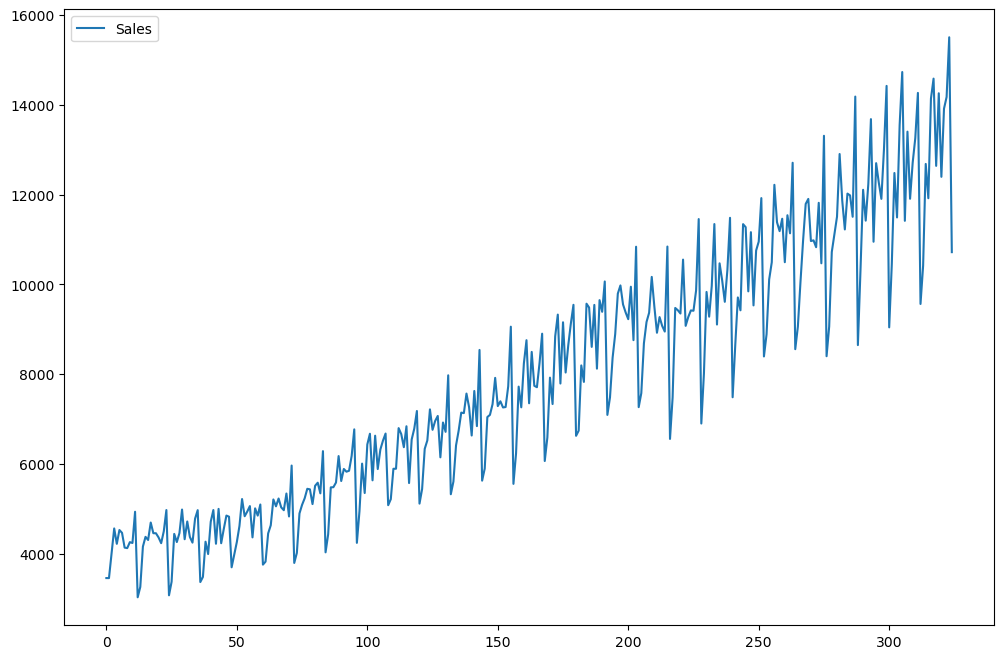

In [106]:
df.columns=['DATE','Sales']
df.plot(figsize=(12,8))




In [107]:
df

,DATE,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [108]:
df['Sale_LastMonth']=df['Sales'].shift(+1)

In [109]:
df['Sale_2Monthsback']=df['Sales'].shift(+2)

In [110]:
df['Sale_3Monthback']=df['Sales'].shift(+3)

In [111]:
df

,DATE,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthback
0,1992-01-01,3459,NaN,NaN,NaN
1,1992-02-01,3458,3459.0,NaN,NaN
2,1992-03-01,4002,3458.0,3459.0,NaN
3,1992-04-01,4564,4002.0,3458.0,3459.0
4,1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...,...
320,2018-09-01,12396,14257.0,12640.0,14583.0
321,2018-10-01,13914,12396.0,14257.0,12640.0
322,2018-11-01,14174,13914.0,12396.0,14257.0
323,2018-12-01,15504,14174.0,13914.0,12396.0


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [114]:
xtrain = scaler_x.fit_transform(xtrain)
xtest = scaler_x.transform(xtest)
ytrain = scaler_y.fit_transform(ytrain)
ytest = scaler_y.transform(ytest)



In [115]:
xtrain.shape

(225, 3)

In [116]:
ytrain.shape

(225, 1)

In [117]:
# Reshape input for CNN (samples, time steps, features)
xtrain = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], 1))


In [118]:
xtrain.shape

(225, 3, 1)

In [119]:
df=df.dropna()
df

,DATE,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthback
3,1992-04-01,4564,4002.0,3458.0,3459.0
4,1992-05-01,4221,4564.0,4002.0,3458.0
5,1992-06-01,4529,4221.0,4564.0,4002.0
6,1992-07-01,4466,4529.0,4221.0,4564.0
7,1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...,...
320,2018-09-01,12396,14257.0,12640.0,14583.0
321,2018-10-01,13914,12396.0,14257.0,12640.0
322,2018-11-01,14174,13914.0,12396.0,14257.0
323,2018-12-01,15504,14174.0,13914.0,12396.0


In [120]:
x=df.iloc[:,2:]

In [121]:
x

,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthback
3,4002.0,3458.0,3459.0
4,4564.0,4002.0,3458.0
5,4221.0,4564.0,4002.0
6,4529.0,4221.0,4564.0
7,4466.0,4529.0,4221.0
...,...,...,...
320,14257.0,12640.0,14583.0
321,12396.0,14257.0,12640.0
322,13914.0,12396.0,14257.0
323,14174.0,13914.0,12396.0


In [122]:
y=df.iloc[:,1:2]

In [123]:
y

,Sales
3,4564
4,4221
5,4529
6,4466
7,4137
...,...
320,12396
321,13914
322,14174
323,15504


In [124]:
# Reshape input for CNN (samples, time steps, features)
xtrain = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], 1))
xtest = xtest.reshape((xtest.shape[0], xtest.shape[1], 1))

In [125]:
import warnings

In [126]:
warnings.filterwarnings('ignore')

In [127]:
# Build the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(xtrain.shape[1], 1)),
    Dropout(0.2),  # Dropout for regularization
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
model.fit(xtrain, ytrain, epochs=100, batch_size=5, validation_data=(xtest, ytest))

# Evaluate the model
loss, mae = model.evaluate(xtest, ytest)
print(f"Test Loss: {loss}, Test MAE: {mae}")


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1938 - mean_absolute_error: 0.3508 - val_loss: 0.0280 - val_mean_absolute_error: 0.1341
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0233 - mean_absolute_error: 0.1326 - val_loss: 0.0176 - val_mean_absolute_error: 0.1039
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0159 - mean_absolute_error: 0.1000 - val_loss: 0.0111 - val_mean_absolute_error: 0.0806
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0206 - mean_absolute_error: 0.1017 - val_loss: 0.0097 - val_mean_absolute_error: 0.0756
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - mean_absolute_error: 0.0778 - val_loss: 0.0088 - val_mean_absolute_error: 0.0718
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0816 - val_loss: 0.0100 - val_mean_absolute_error: 0.0777
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - mean_absolute_error: 0.0753 - val_loss

In [128]:
predict=model.predict(xtest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


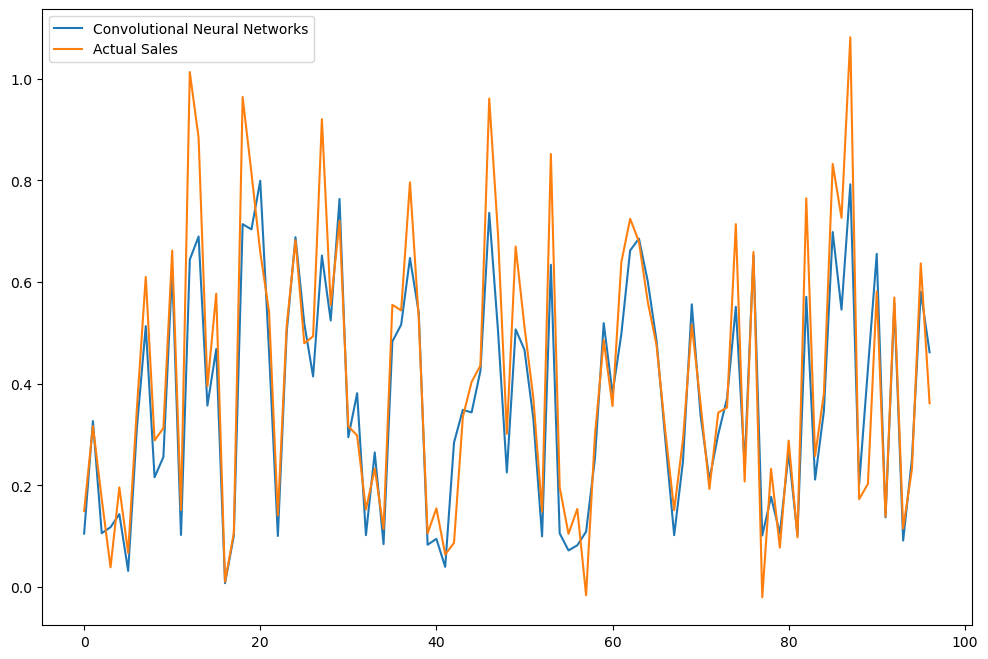

In [129]:
plt.figure(figsize=(12,8))
plt.plot(predict,label = 'Convolutional Neural Networks')
plt.plot(ytest,label = 'Actual Sales')
plt.legend(loc= 'upper left')
plt.show()